<a href="https://colab.research.google.com/github/rahulpower2012/SparksFoundation-DS-ML-internship/blob/master/Task4/Task4_To_explore_decision_tree_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 4 for data science internship**
## To explore decision tree algorithm

In [1]:
import pandas as pd
import numpy as anp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/rahulpower2012/SparksFoundation-DS-ML-internship/master/Task3/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Visualizing the data using Sepal Length and Petal Length features

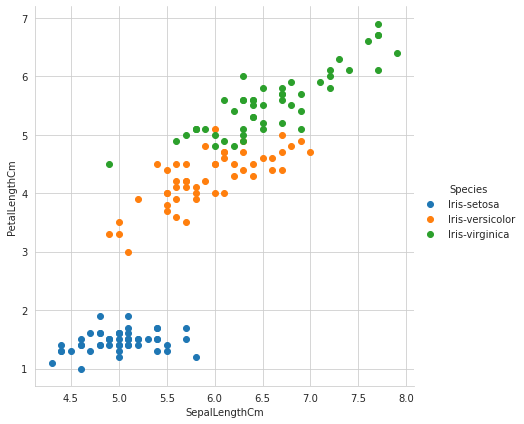

In [3]:
sns.set_style("whitegrid") 
sns.FacetGrid(data, hue ="Species",  height = 6).map(plt.scatter, 'SepalLengthCm', 'PetalLengthCm').add_legend()
plt.show()

## Encoding the string labels for easier classification

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Species_E = le.fit_transform(data["Species"])

In [5]:
data_encoded_labels = data.drop("Species",axis=1)
data_encoded_labels["Species_encoded"] = Species_E
data_encoded_labels.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoded
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## Creating training data and test data from the given data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:-2], Species_E, test_size=0.2)

## Training the Decision Tree Classifier and predicitng the labels for Species and displaying the difference

In [7]:
from sklearn.tree import DecisionTreeClassifier
Iris_classifier = DecisionTreeClassifier()
Iris_classifier.fit(X_train,y_train)
y_pred = Iris_classifier.predict(X_test)
aftData = pd.DataFrame()
aftData["Ground truth"] = le.inverse_transform(y_test)
aftData["Predicted labels"] = le.inverse_transform(y_pred)
aftData

,Ground truth,Predicted labels
0,Iris-versicolor,Iris-versicolor
1,Iris-versicolor,Iris-versicolor
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-setosa,Iris-setosa
5,Iris-versicolor,Iris-versicolor
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-setosa,Iris-setosa


## Visualizing decision tree

In [8]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


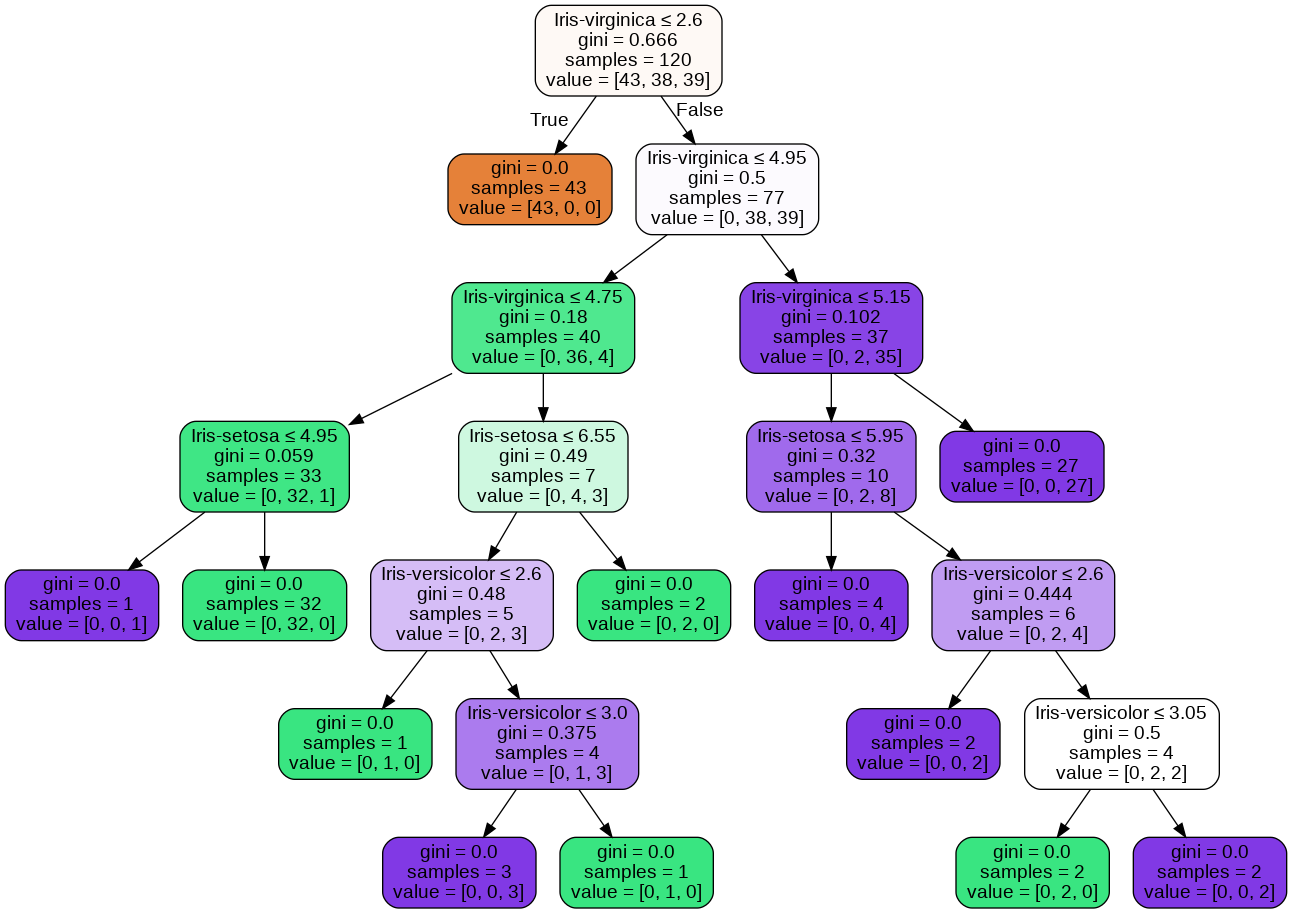

In [9]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(Iris_classifier, out_file=dot_data, feature_names=le.classes_,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Dispalying metrics of the Decision Tree Classifier


Balanced accuracy score = 0.9419191919191919



*Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



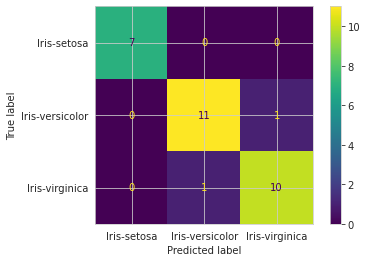

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
cm = multilabel_confusion_matrix(le.inverse_transform(y_test),le.inverse_transform(y_pred),labels=le.classes_)
plot_confusion_matrix(Iris_classifier, X_test, y_test, display_labels=le.classes_)
print("\nBalanced accuracy score = "+str(metrics.balanced_accuracy_score(y_test,y_pred))+"\n\n")
print('\n*Classification Report:\n', classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))